Notebook taken from https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.05-Naive-Bayes.ipynb

# Here we are interested in finding the probability of a label given some observed features which are written as P(L|features)
# This quantity can be expressed as quanttities we can express easiy.
# P(L|features)=P(features|L)P(L)/P(features)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

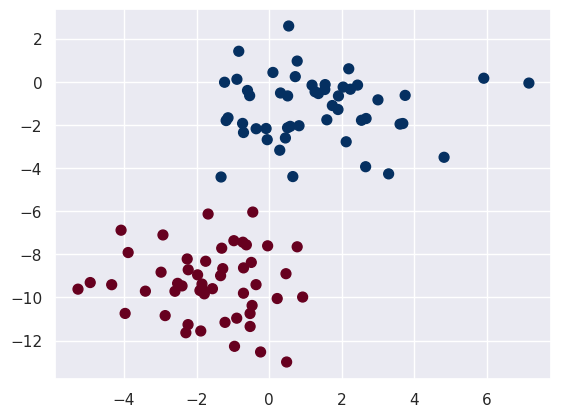

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5) 
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

# The generates a synthetic dataset using the make_blobs function from scikit-learn. 
# It creates a 2-dimensional dataset with 100 samples and 2 clusters. 
# The centers parameter specifies the number of clusters, and the random_state parameter ensures reproducibility 
# of the results. The cluster_std parameter controls the standard deviation of the clusters, influencing 
# the spread of the generated data points.

# The X variable contains the feature vectors representing the data points, and the y variable contains 
# the corresponding labels indicating the cluster membership of each data point.

In [3]:
X   #This has 100 arrays. each array has 2 data point

array([[  0.92141506,  -9.98499137],
       [ -5.26927614,  -9.6186543 ],
       [ -0.45292089,  -6.04316334],
       [ -0.0856312 ,  -2.16867404],
       [  1.53194956,  -0.36022153],
       [ -0.72443515,  -7.44202457],
       [ -0.52577983, -11.34940749],
       [ -1.23044866,  -0.02408431],
       [ -2.25997736,  -8.21779094],
       [  0.77075118,  -7.65464691],
       [  1.90846569,  -0.6583068 ],
       [  2.99659881,  -0.83960814],
       [ -1.75036425,  -8.32495776],
       [  1.26386427,  -0.46380574],
       [ -2.92821038,  -7.10474478],
       [ -1.18679697,  -1.80057881],
       [ -0.70730261,  -8.6320622 ],
       [ -0.597949  ,  -0.40605237],
       [ -3.88704121,  -7.92023943],
       [ -0.49365731,  -8.378556  ],
       [ -0.97378999,  -7.371431  ],
       [  0.7183647 ,   0.23622995],
       [  1.355409  ,  -0.54741367],
       [ -0.47151448, -10.37571491],
       [ -0.95592795, -12.26939394],
       [ -2.5972638 ,  -9.71612662],
       [  0.44653092,  -2.60752136],
 

In [4]:
y # This labels each individual array in the bigger X array.

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [5]:
X[:,0]  #First element of eah array

array([ 0.92141506, -5.26927614, -0.45292089, -0.0856312 ,  1.53194956,
       -0.72443515, -0.52577983, -1.23044866, -2.25997736,  0.77075118,
        1.90846569,  2.99659881, -1.75036425,  1.26386427, -2.92821038,
       -1.18679697, -0.70730261, -0.597949  , -3.88704121, -0.49365731,
       -0.97378999,  0.7183647 ,  1.355409  , -0.47151448, -0.95592795,
       -2.5972638 ,  0.44653092, -4.93225332, -0.04304745,  0.65087822,
        0.31190778, -0.88989127,  2.19201955, -1.21779287, -2.29661532,
       -3.4119278 , -4.08223794, -0.83889419, -0.89524628,  1.54082983,
        2.2374372 , -2.86703029, -0.62985746,  1.74015978, -1.32676236,
       -1.56430585, -0.53887254,  2.03754653, -2.23658448, -0.70822817,
       -1.84360609,  0.77102877,  2.54279316,  0.57898032, -2.40190838,
        2.12119683,  0.46218028,  0.50787945, -0.52731615, -0.36011954,
        0.50567512,  3.29089003, -1.97310998,  0.5371199 ,  2.65696448,
       -0.709394  , -1.90907668,  0.82161761,  1.5880298 ,  0.22

In [6]:
X[:,1]  #Second element of each array

array([ -9.98499137,  -9.6186543 ,  -6.04316334,  -2.16867404,
        -0.36022153,  -7.44202457, -11.34940749,  -0.02408431,
        -8.21779094,  -7.65464691,  -0.6583068 ,  -0.83960814,
        -8.32495776,  -0.46380574,  -7.10474478,  -1.80057881,
        -8.6320622 ,  -0.40605237,  -7.92023943,  -8.378556  ,
        -7.371431  ,   0.23622995,  -0.54741367, -10.37571491,
       -12.26939394,  -9.71612662,  -2.60752136,  -9.31238561,
        -7.60915598,  -4.39797054,  -0.52199607,   0.11369336,
         0.60036835, -11.15836353, -11.6406339 ,  -9.71171816,
        -6.88469836,   1.41316281, -10.96464394,  -0.1324291 ,
        -0.3476192 , -10.84498679,  -7.56390652,  -1.10379588,
        -4.41753005,  -9.59730336,  -0.6449586 ,  -0.24742774,
       -11.26289379,  -2.35468348,  -9.59318151,   0.95860323,
        -1.7870558 ,  -2.06887799,  -9.46793749,  -2.78419362,
        -8.90235829,  -0.65781509, -10.74779592,  -2.18001056,
        -2.13390391,  -4.27232081,  -8.95514262,   2.58

[(-8.0, 8.0), (-15.0, 5.0)]

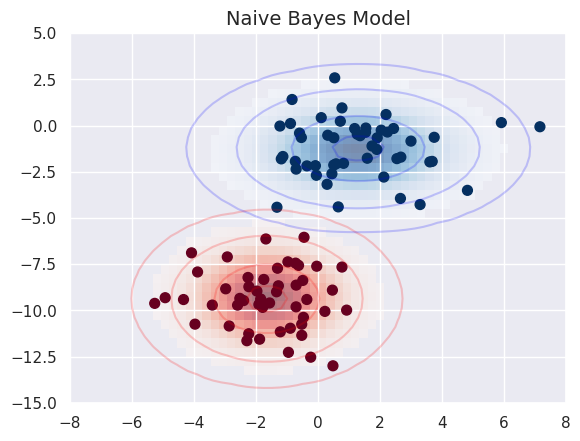

In [7]:
fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)
    
ax.set(xlim=xlim, ylim=ylim)

#fig.savefig('figures/05.05-gaussian-NB.png')

In [10]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [13]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand (20000,2)#(2000, 2) Increasesd the points to see the boundary better and
ynew = model.predict(Xnew)                                 # to check if the predictions are correct. 

#rng.rand(2000, 2) gives array of 2D random numbers each of length 2000

# Xnew is the newly generated datapoints
# we are predicting the labels by fitting the model on the Xnew data

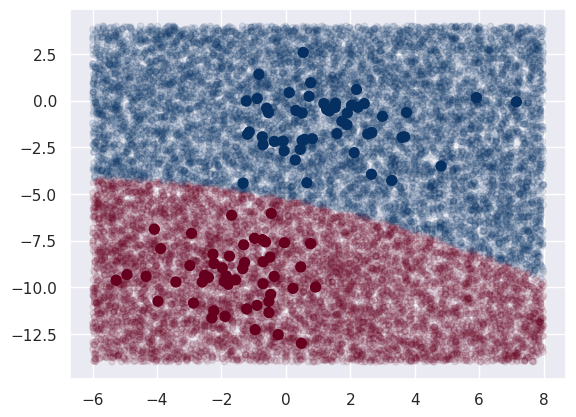

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu') # old set
#lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
#plt.axis(lim);

In [15]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)    #This give the probabilility of how correct the new labels are.

array([[0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.21, 0.79],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

# Multinomial Naive Bayes

In [19]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

# Files names and data

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [27]:
len(data.data)

11314

In [30]:
data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [34]:
data.data[1121]

'From: kjetilk@stud.cs.uit.no (Kjetil Kolin)\nSubject: Protected Mode ?\nOrganization: University of Tromsoe\nLines: 6\n\nIs there anybody who has (or can point me in the right direction) any\ninformation about protected mode? Also interested in protected mode viewed from\na OS point of view.\n\n\tThanks in advance\n\t\tKjetil Kolin\n'

In [37]:
categories = ['talk.religion.misc', 'soc.religion.christian', # download a few categories
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [45]:
len(train)

5

In [46]:
len(test)

5

In [48]:
print(train.data[0])

From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)
Subject: Re: Losing your temper is not a Christian trait
Organization: Motorola LPA Development
Lines: 26

In article <Apr.23.02.55.47.1993.3138@geneva.rutgers.edu>, jcj@tellabs.com
(jcj) wrote:

> I'd like to remind people of the withering of the fig tree and Jesus
> driving the money changers et. al. out of the temple.  I think those
> were two instances of Christ showing anger (as part of His human side).
> 
Yes, and what about Paul saying:

26 Be ye angry, and sin not: let not the sun go down upon your wrath:
(Ephesians 4:26).

Obviously then, we can be angry w/o sinning.

Jon

------------------------------------------------
Jon Ogden         - jono@mac-ak-24.rtsg.mot.com
Motorola Cellular - Advanced Products Division
Voice: 708-632-2521      Data: 708-632-6086
------------------------------------------------

They drew a circle and shut him out.
Heretic, Rebel, a thing to flout.
But Love and I had the wit to win;
We drew a circle and 

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [50]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

In [51]:
labels

array([2, 0, 1, ..., 1, 2, 1])

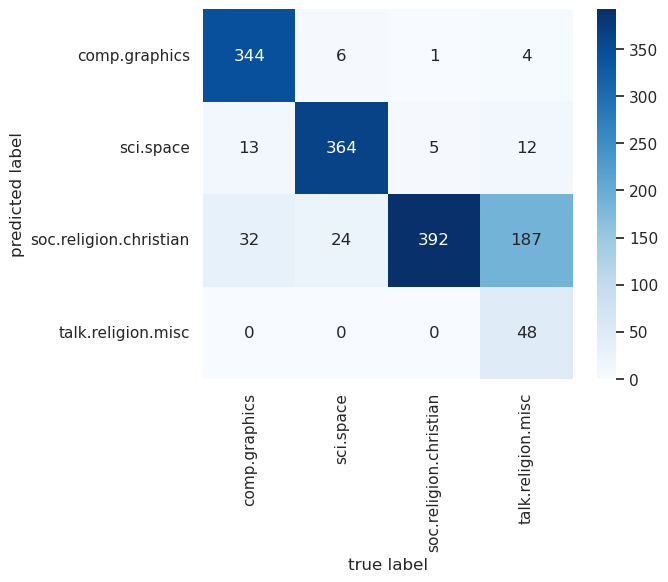

In [52]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [53]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [54]:
predict_category('sending a payload to the ISS')

'sci.space'

In [55]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [56]:
predict_category('determining the screen resolution')

'comp.graphics'

In [57]:
predict_category('Digital information, when converted into a DNA sequence, provides dense, stable, energy-efficient, and sustainable data storage. The most stable method for encapsulating DNA has been in an inorganic matrix of silica, iron oxide, or both, but are limited by low DNA uptake and complex recovery techniques.')

'sci.space'

In [58]:
predict_category('In today’s digital information age, the global demand for data storage is growing at an exponential rate')

'sci.space'